In [10]:
import json
import numpy as np
import matplotlib.pyplot as plt
from spg_overlay.utils.constants import DRONE_INITIAL_HEALTH
from collections import defaultdict


In [11]:
with open("benchmarks/benchmark_4-1.json", "r") as f:
    data = json.load(f)
print(f"{len(data)} items found")


200 items found


In [12]:
score_names = ["score","percent_rescued","score_timestep","score_health_returned","score_exploration","percent_drones_destroyed", "mean_drones_health"]

scores = {name:{} for name in score_names}
for d in data:
    for name in score_names:
        map_name = d["map_name"]+"\n"+d["zones"]
        if map_name not in scores[name]:
            scores[name][map_name] = []
        scores[name][map_name].append(d[name])
        
for map_name in scores["mean_drones_health"]:
    scores["mean_drones_health"][map_name] = [100*x/DRONE_INITIAL_HEALTH for x in scores["mean_drones_health"][map_name]]

In [13]:
for map_name in scores["score"]:
    print(map_name.replace('\n', '_'), len(scores["score"][map_name]))

MyMapFinal2022_23_no_com_zone 20
MyMapFinal2022_23_no_gps_zone 20
MyMapFinal2022_23_none 20
MyMapFinal2022_23_kill_zone 20
MyMapFinal_2023_24_01_none 20
MyMapFinal_2023_24_02_none 20
MyMapFinal_2023_24_03_none 20
MyMapFinal_2023_24_01_no_com_zone 20
MyMapFinal_2023_24_02_kill_zone 20
MyMapFinal_2023_24_03_no_gps_zone 20


In [14]:
has_crashed = []
for info in data:
    if info["has_crashed"]:
        has_crashed.append(info)
        
print(f"{len(has_crashed)} runs have crashed")
for info in has_crashed:
    print(info["stdout_file"])

0 runs have crashed


In [15]:
def plot_score(scores, title:str):
    # Prepare data for boxplot
    keys = sorted(scores.keys()) 
    values = [scores[key] for key in keys]
    
    # Create the boxplot
    plt.figure(figsize=(10, 8))
    boxplot = plt.boxplot(values, labels=keys, patch_artist=True, showmeans=False, 
                          boxprops=dict(facecolor='skyblue', color='blue'),
                          whis=[0, 100])
    
    # Add labels and title
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0,100)
    
    # Rotate the x-axis labels
    plt.xticks(rotation=90)
    
    # Show the plot
    plt.tight_layout()
    plt.show()


Mean score: 73.35285537687125
Old score: 73.117379310403


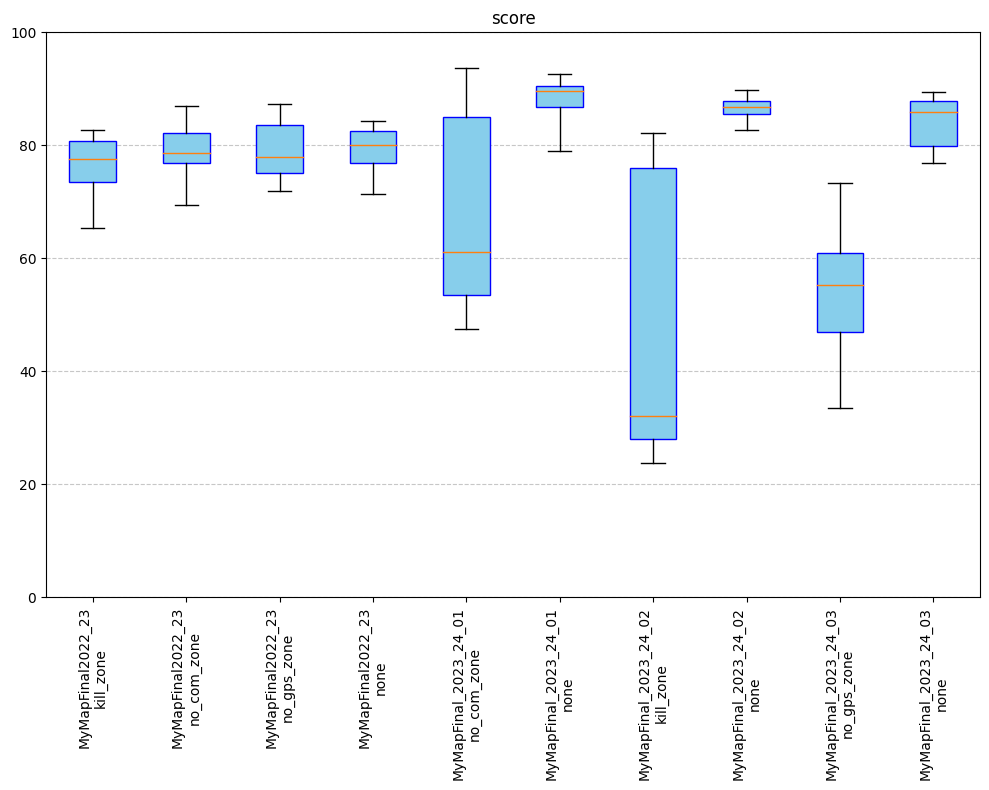

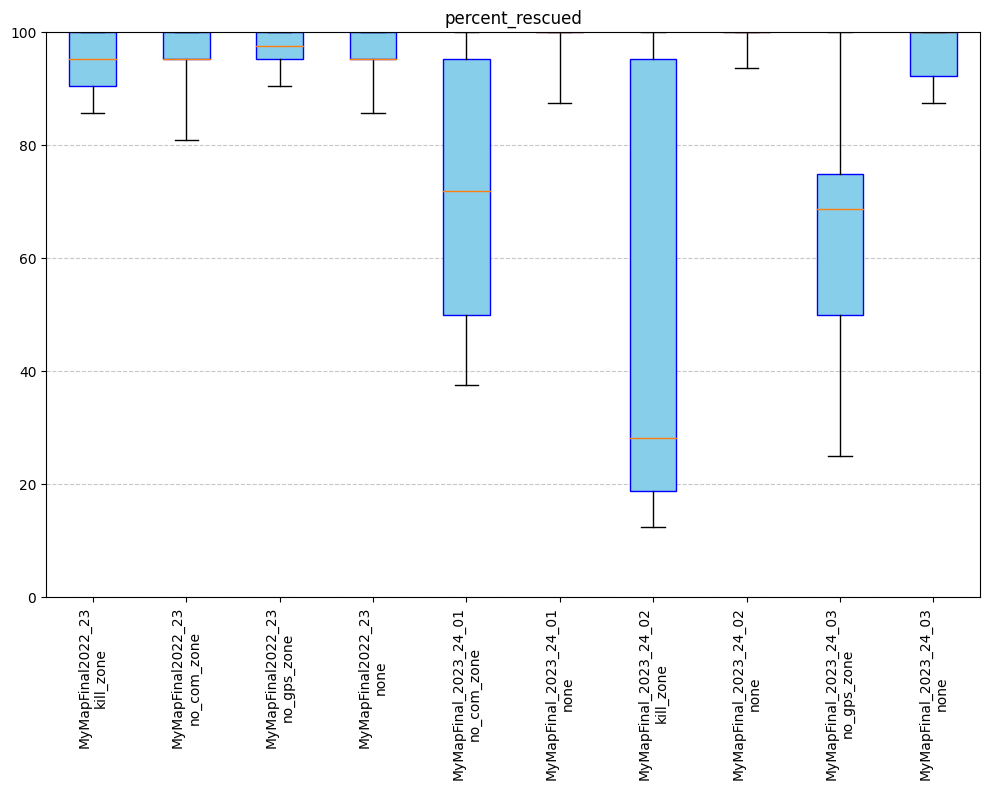

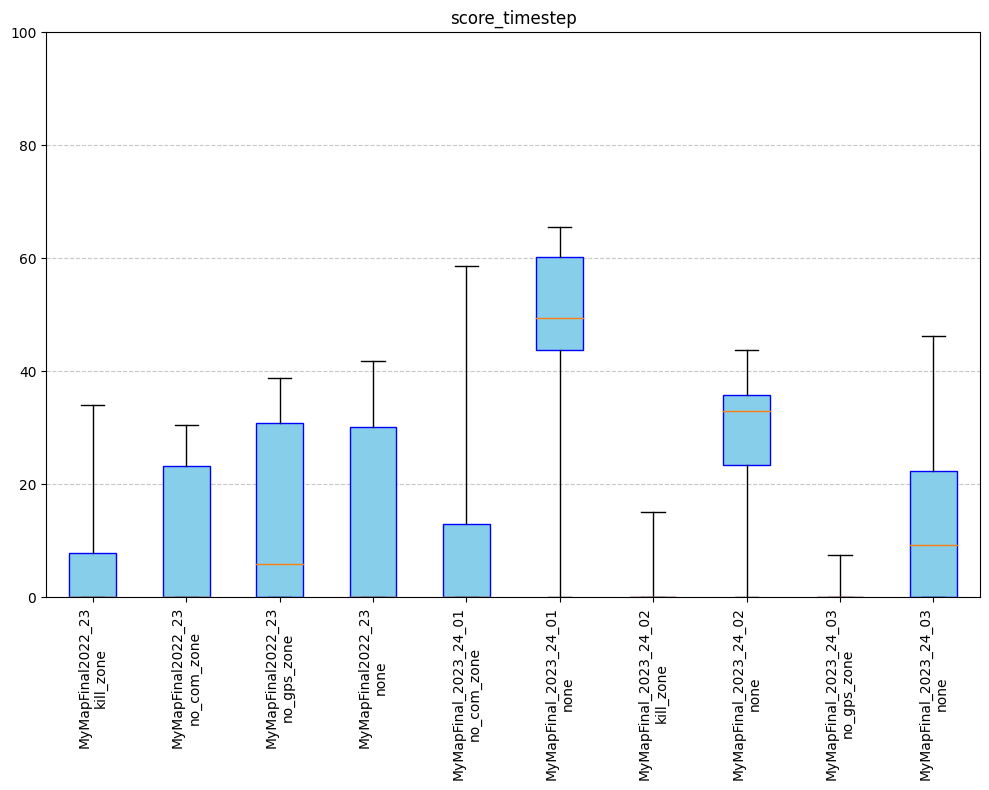

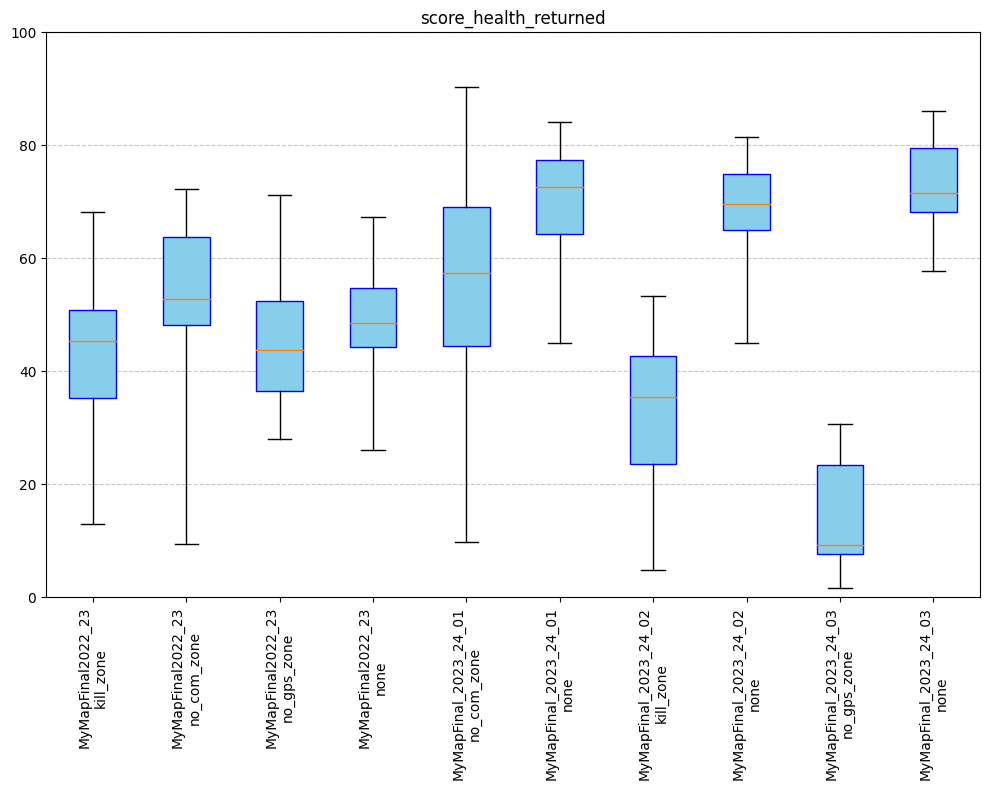

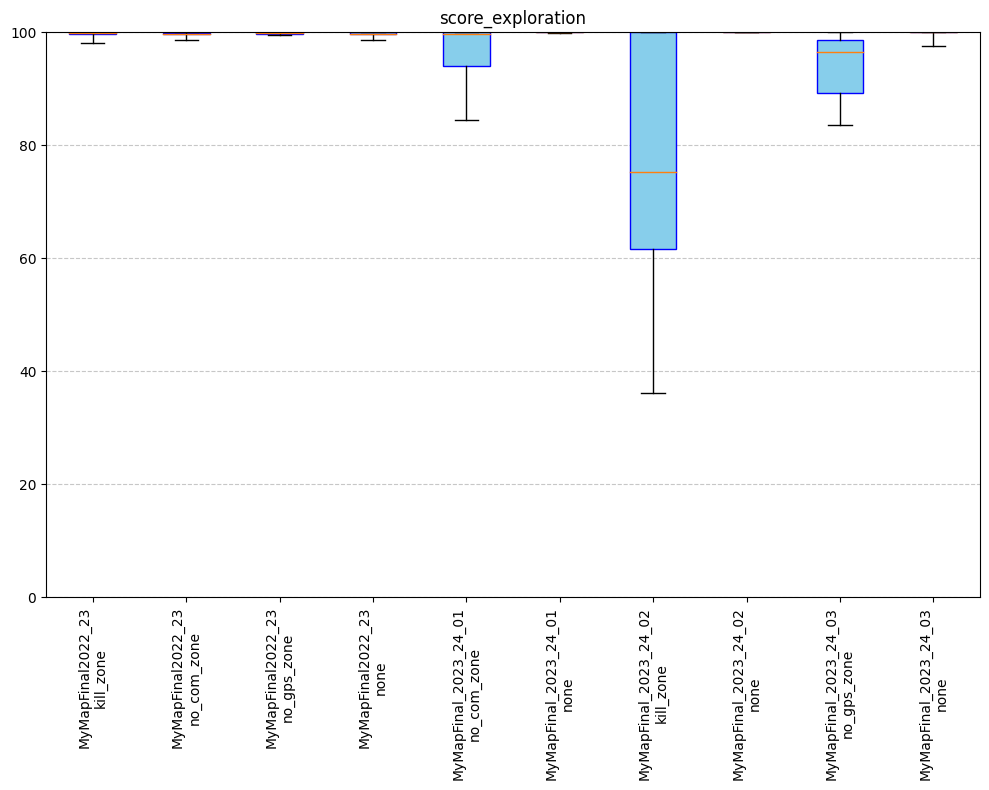

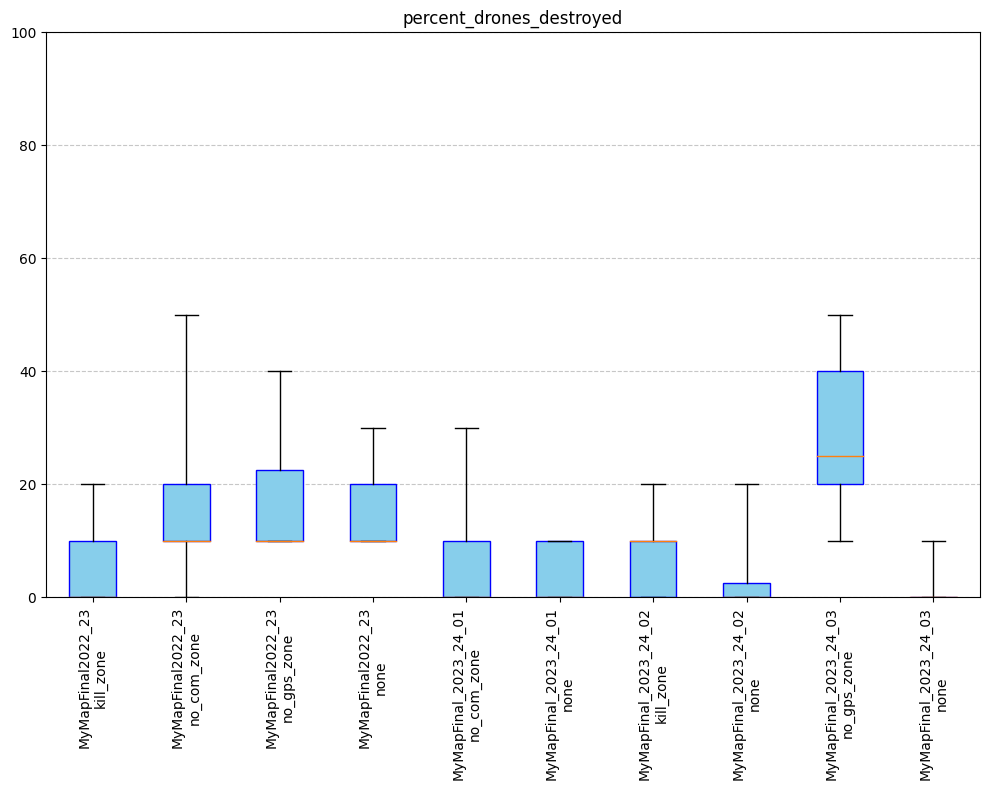

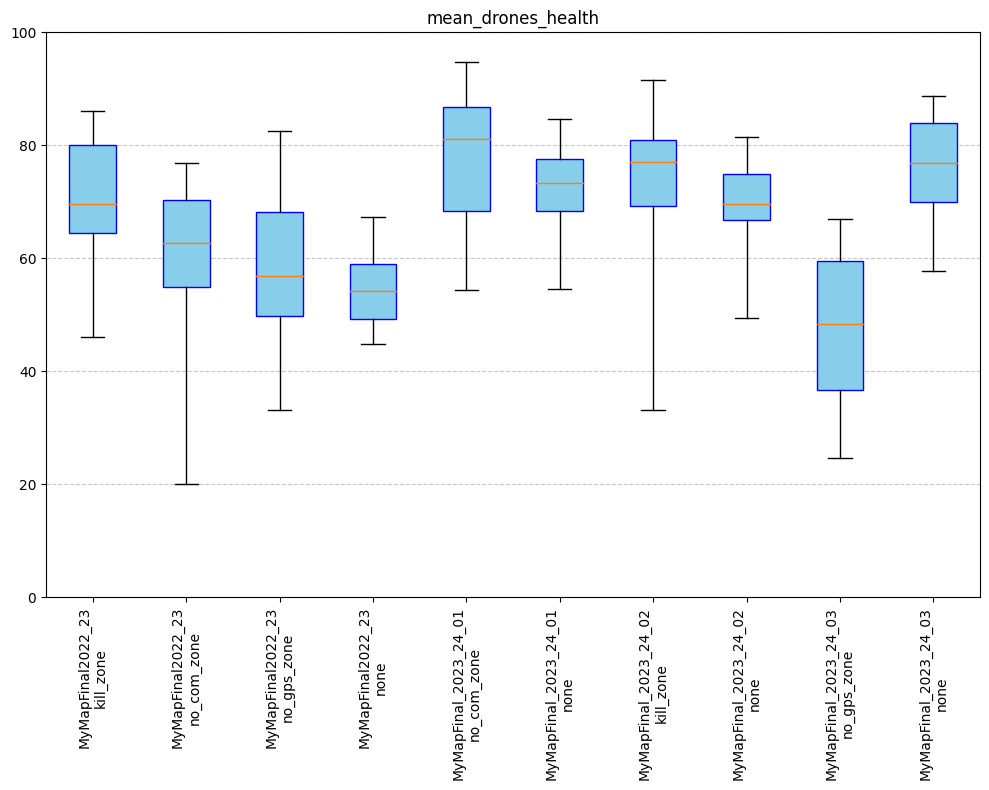

In [16]:
total_score = []
old_score = []
count = 0
old_map_weight = 0.5

for map_name in (scores["score"].keys()):
    if "22_23" in map_name:
        total_score.append(old_map_weight*np.mean(scores["score"][map_name]))
        old_score.append(old_map_weight*(0.6*np.mean(scores["percent_rescued"][map_name])+
                              0.2*np.mean(scores["score_exploration"][map_name])+
                              0.2*np.mean(scores["score_timestep"][map_name])))
        count += old_map_weight
    else:
        total_score.append(np.mean(scores["score"][map_name]))
        old_score.append(0.6*np.mean(scores["percent_rescued"][map_name])+
                              0.2*np.mean(scores["score_exploration"][map_name])+
                              0.2*np.mean(scores["score_timestep"][map_name]))
        count += 1
print("Mean score:",sum(total_score)/count)
print("Old score:",sum(old_score)/count)

for name in score_names:
    plot_score(scores[name], name)

In [17]:
# Videos of lowest scores

grouped_data = defaultdict(list)
for entry in data:
    grouped_data[entry["map_name"]+"_"+entry["zones"]].append(entry)
    
list(grouped_data.keys())

['MyMapFinal2022_23_no_com_zone',
 'MyMapFinal2022_23_no_gps_zone',
 'MyMapFinal2022_23_none',
 'MyMapFinal2022_23_kill_zone',
 'MyMapFinal_2023_24_01_none',
 'MyMapFinal_2023_24_02_none',
 'MyMapFinal_2023_24_03_none',
 'MyMapFinal_2023_24_01_no_com_zone',
 'MyMapFinal_2023_24_02_kill_zone',
 'MyMapFinal_2023_24_03_no_gps_zone']

In [18]:

# selected_maps =  list(grouped_data.keys())
selected_maps = ["MyMapFinal_2023_24_01_no_com_zone","MyMapFinal_2023_24_02_kill_zone","MyMapFinal_2023_24_03_no_gps_zone"]
number_files_per_map = 5

# Find the 5 lowest scores for each map_name
result = {}

for map_name, entries in grouped_data.items():
    if map_name not in selected_maps:
        continue
    
    
    # Sort entries by score
    sorted_entries = sorted(entries, key=lambda x: x["score"])
    # Take the top 5 lowest scores
    lowest_scores = sorted_entries[:number_files_per_map]

    
    # Extract filename_video_capture
    result[map_name] = [entry["filename_video_capture"] for entry in lowest_scores]

print(json.dumps(result, indent=2))

{
  "MyMapFinal_2023_24_01_no_com_zone": [
    "/home/infres/hverninas-22/results_swarm_rescue/team01_241226_16h52min45s/94deeeb8-4efb-49dc-8621-d3c7483c4b71_map_MyMapFinal_2023_24_01_zone_NO_COM_ZONE/videos/team01_MyMapFinal_2023_24_01_no_com_zone.avi",
    "/home/infres/hverninas-22/results_swarm_rescue/team01_241226_16h52min45s/3912dfb2-1872-4e91-9321-ebec0d5d1781_map_MyMapFinal_2023_24_01_zone_NO_COM_ZONE/videos/team01_MyMapFinal_2023_24_01_no_com_zone.avi",
    "/home/infres/hverninas-22/results_swarm_rescue/team01_241226_16h52min45s/1c7bf79d-c1d4-425e-847e-d11d568c3ce8_map_MyMapFinal_2023_24_01_zone_NO_COM_ZONE/videos/team01_MyMapFinal_2023_24_01_no_com_zone.avi",
    "/home/infres/hverninas-22/results_swarm_rescue/team01_241226_16h52min45s/7794c723-b92d-412d-9825-906cd979c96d_map_MyMapFinal_2023_24_01_zone_NO_COM_ZONE/videos/team01_MyMapFinal_2023_24_01_no_com_zone.avi",
    "/home/infres/hverninas-22/results_swarm_rescue/team01_241226_16h52min45s/d95619df-74d1-44ac-82e4-79b6718